<h1 align="center"> <font color = green> Restaurant Case Study (EdgeVerve) </font></h1>

## Problem Statements
1. What is the best location in Bangalore to open a restaurant? Why?
2. Help him choose a cuisine for the restaurant? Why?
3. Create a Machine Learning model for them that would look at the reviews posted by their customers and tell them their ranking in the city.

In [1]:
# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt         # Visualization library
import seaborn as sns                   # Visualization library

### 1. `Loading data` 

In [3]:
# Load data file
df_zomato = pd.read_csv("zomato.csv",encoding="UTF-8")
# Making a copy of data (It is advisable to make a copy of original data before any modifications)
df_zomato_copy = df_zomato.copy()

### 2. `Inspection` of dataframe 
#### *`Lap-1:`*

  1. View the dataframe.  
  2. Check the dimensions of the dataframe.
  3. Understand the data types, no of non-null data to get an initial look at data attributes.
  4. Column listing to understand the metadata information of the data.
  5. Descriptive statistics to understand the primary spread of the data.
  
__*`Note`:*__ *We repeat the process of data inspection until data pre-processing is completely done.*

In [4]:
# 2.1 Visualize the data
df_zomato.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [5]:
# 2.2 Shape of dataframe
df_zomato.shape

(51717, 17)

In [6]:
# 2.3 Columns in the dataframe
df_zomato.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

#### Data Dictionary for reference

1. `url:` The url of the restaurant on zomato website
2. `address:` Address of restaurant in benguluru
3. `name:` Name of the restaurant
4. `online_order:` Whether a restaurant takes online order or not (Categorical - Yes or No)
5. `book_table:` Table book option available or not
6. `rate:` Overall rating of the restaurant out of 5
7. `votes:` Total number of rating for the restaurant as of the above mentioned date
8. `phone:` Contact Number of Restaurant
9. `location:` Neighborhood in which restaurant is located
10. `rest_type:` Restaurant Type (Categorical)
11. `dish_liked:` Dishes people liked in the restaurant
12. `cuisine:` Food Style
13. `approx_cost (for two people):` Cost for 2 people to eat in that restaurant
14. `review_list:` list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer
15. `menu_item:` list of menus available in the restaurant
16. `listed_in(meal):` Type of meal (Categorical)
17. `listed_in(city):` Neighborhood in which restaurant is listed

In [7]:
# 2.4 General details about dataframe
df_zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [8]:
# 2.5 Descriptive statistics
df_zomato.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


__Remarks:__ `rate column` should also be a numeric number, which we should change it to

### 3. `Data Pre-Processing`
To start with data processing, let us look at the percentage null values in each column and see what we can do about it.

#### `Dropping Duplicates`
In this case, We cannot compare the entire row to drop duplicated because an addition of a review will change the entire row. Let us drop the duplicates basing on 2 columns: `address` and `name`.

In [9]:
# Finally, Drop Duplicates
df_zomato = df_zomato.drop_duplicates(subset=['address', 'name']).reset_index().drop('index', axis=1)
df_zomato.head(2)
df_zomato_copy1 = df_zomato.copy()

In [10]:
# Shape of the data
df_zomato.shape

(12499, 17)

#### Cleaning `rate column`

In [11]:
# Step 1: Total number of empty columns
# Step 1: Null count in each column
null_count_each_column = df_zomato.isnull().sum(axis = 0)
# Step 2: Counting the number of empty columns 
Number_of_empty_columns = null_count_each_column[null_count_each_column == df_zomato.shape[0]].count()

print("Total number of empty columns:")
print(Number_of_empty_columns)

Total number of empty columns:
0


__Remarks:__ 
1. It looks like there are no `empty columns`. 
2. While looking at the columns, `menu_item` column had __empty lists__ which is equivalent to having a null. 
3. Let us impute the `[] in menu_items` with `NaN`

In [12]:
# Print the total number of unique menus
print('Total Number of Unique Menus',df_zomato['menu_item'].nunique())

Total Number of Unique Menus 2279


__Remarks__ 
1. `menu_item` has 9098 unique values. __Replace all `[]` in `menu_item` column with NaN__. 
2. This will help us understand the missing data in this column.

In [13]:
# 3.2 Fill blanks in each column with NAs
df_zomato['menu_item'] = df_zomato['menu_item'].replace('[]',np.nan)

In [14]:
# Finding out percentage missing values
column_wise_null_percent_1 = round(100*(df_zomato.isnull().sum(axis=0)/len(df_zomato.index)),2).sort_values(ascending = False)
# Total number of columns with null values
print('Total number of columns with null values are')
print(column_wise_null_percent_1[column_wise_null_percent_1 > 0].shape)
column_wise_null_percent_1[column_wise_null_percent_1 > 0]

Total number of columns with null values are
(8,)


menu_item                      81.61
dish_liked                     63.13
rate                           19.24
phone                           2.14
rest_type                       0.50
approx_cost(for two people)     0.47
cuisines                        0.15
location                        0.07
dtype: float64

__Remarks:__ (Let us discuss ways to impute)
1. `menu_item` and `dish-liked` has highest percent missing values. 
    - At this point, we are not planning to analyse each menu item or dish liked. So, let us ignore imputation for now
    - At the time of solving problem 3, We need a corpus of dishes to extract best features. There we will decide whether to impute the menu and liked dishes or not.
    - `Menu data is a very good resource to create a food corpus`


2. `Rate` is the overall aggregate rating of a particular restaurant. Since it is an auto update value in zomato, there seems to have only 2 reasons for a `Nan value`
    - The restaurant is new and there are no reviews
    - There is a scrapping error.
    - We can impute it by computing aggregate of ratings from `reviews_list` column if any.


3. We are ignoring phone number imputation for now.
4. `approx_cost(for two people)` is a valuble column while determining the restaurant type as per location. The best way to impute it with basic statistics would be to
    - Mean or Median value of diner type per location


5. `rest_type` can be imputed using the `location` wise familiar restaurants.
6. `Cuisines` and `Location` can be imputed leveraging `menu_items` and `address` columns. Since, the lost data is minimal, we prefer dropping those rows.   

__Note:__ We will start by imputing /dropping from $6^{th}$ - $1^{st}$ point in the above notes.

##### 6. Dropping rows with `Cuisines` and `locations` with null values

In [15]:
# Deleting rows
df_zomato.dropna(subset=['location','cuisines'], inplace = True) 
# Checking the percent rows left
print('Percentage of rows available:')
100 * df_zomato.shape[0]/ df_zomato_copy1.shape[0]

Percentage of rows available:


99.84798783902713

In [16]:
# Finding out percentage missing values
column_wise_null_percent_2 = round(100*(df_zomato.isnull().sum(axis=0)/len(df_zomato.index)),2).sort_values(ascending = False)
# Total number of columns with null values
print('Total number of columns with null values are')
print(column_wise_null_percent_2[column_wise_null_percent_2 > 0].shape)
column_wise_null_percent_1[column_wise_null_percent_2 > 0]

Total number of columns with null values are
(6,)


menu_item                      81.61
dish_liked                     63.13
rate                           19.24
phone                           2.14
rest_type                       0.50
approx_cost(for two people)     0.47
dtype: float64

##### 5. Imputing null columns in `restaurant type`: Impute with location wise famous restaurant types

In [17]:
# index with null values of restaurant type
index_df_rest = list(df_zomato[['rest_type']].loc[df_zomato['rest_type'].isnull()].index)
len(index_df_rest)

54

In [18]:
# Location wise famous restaurant types
x = {}
for i in df_zomato['location'].unique():
    x[i] = df_zomato.loc[df_zomato['location'] == i]['rest_type'].value_counts().index[0]

In [19]:
# Impute location wise famous restaurant type into the Nan values
for i in index_df_rest:
    df_zomato.loc[i,'rest_type'] = x[df_zomato.loc[i,'location']]

In [20]:
# Finding out percentage missing values
column_wise_null_percent_3 = round(100*(df_zomato.isnull().sum(axis=0)/len(df_zomato.index)),2).sort_values(ascending = False)
# Total number of columns with null values
print('Total number of columns with null values are')
print(column_wise_null_percent_3[column_wise_null_percent_3 > 0].shape)
column_wise_null_percent_1[column_wise_null_percent_3 > 0]

Total number of columns with null values are
(5,)


menu_item                      81.61
dish_liked                     63.13
rate                           19.24
phone                           2.14
approx_cost(for two people)     0.47
dtype: float64

##### 4. Imputing null colums in `approx_cost(for two people)`: Impute with mean cost of each dine type 

In [21]:
# index with null values of approximate cost
index_df_cost = list(df_zomato.loc[df_zomato['approx_cost(for two people)'].isnull()].index)
len(index_df_cost)

50

In [22]:
df_zomato.to_string(columns = ['approx_cost(for two people)'])
df_zomato['approx_cost(for two people)'].dtype

dtype('O')

In [23]:
df_zomato['approx_cost(for two people)'] = df_zomato['approx_cost(for two people)'].str.replace(",","").astype(float)

In [24]:
# Restaurant type wise approx cost
x = {}
for i in df_zomato['rest_type'].unique():
    x[i] = round(df_zomato.loc[df_zomato['rest_type'] == i]['approx_cost(for two people)'].mean(),0)

In [25]:
# Impute location wise famous restaurant type into the Nan values
for i in index_df_cost:
    df_zomato.loc[i,'approx_cost(for two people)'] = x[df_zomato.loc[i,'rest_type']]

In [26]:
# Finding out percentage missing values
column_wise_null_percent_4 = round(100*(df_zomato.isnull().sum(axis=0)/len(df_zomato.index)),2).sort_values(ascending = False)
# Total number of columns with null values
print('Total number of columns with null values are')
print(column_wise_null_percent_4[column_wise_null_percent_4 > 0].shape)
column_wise_null_percent_4[column_wise_null_percent_4 > 0]

Total number of columns with null values are
(4,)


menu_item     81.61
dish_liked    63.08
rate          19.14
phone          2.05
dtype: float64

##### Imputing `rate` using `reviews_list`:
While imputing rate, Ideally, we have to extract independent ratings from reviews_list and then rate it. But having a time constraint, I am leaving this at this point of time. At this point, populating Nan with -1 (dummy) for convineance

In [27]:
# Have a look at the review_list
df_zomato[df_zomato['reviews_list'] == '[]'].index

Int64Index([   73,    89,    90,    93,   104,   105,   106,   109,   110,
              112,
            ...
            12475, 12476, 12477, 12479, 12481, 12483, 12484, 12486, 12494,
            12498],
           dtype='int64', length=2497)

In [28]:
# Extract the datatype literal from string input
import ast
df_zomato['reviews_list'] =  df_zomato['reviews_list'].apply(ast.literal_eval)

In [29]:
# Removing the `/5` part of the rate
df_zomato['rate'] = df_zomato['rate'].str.split('/').str[0]

In [30]:
# Let us look at the unique values of the rate column
df_zomato['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5', nan,
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '-', '3.6 ', '4.8', '3.9 ', '3.7 ', '2.9 ', '2.8 ', '4.2 ',
       '3.5 ', '4.1 ', '2.7 ', '3.4 ', '3.3 ', '3.2 ', '4.3 ', '4.9',
       '2.1', '2.0', '4.4 ', '4.5 ', '1.8', '4.0 ', '4.6 ', '3.1 ',
       '3.0 ', '2.6 ', '2.3 ', '2.5 ', '4.7 ', '4.8 ', '4.9 ', '2.4 ',
       '2.0 '], dtype=object)

__Remarks:__ Other than `nan`, rate has `NEW` and `-` which also are `Nan` values. Let us impute them first

##### Handling `NEW` , `-` and `` values in rate

In [31]:
df_zomato[['reviews_list','rate']].loc[(df_zomato['rate']=="NEW") | (df_zomato['rate']=="-")].head()

,reviews_list,rate
70,"[(Rated 4.0, RATED\n cost for chicken rolls i...",NEW
73,[],NEW
107,"[(Rated 1.0, RATED\n I have been here many ti...",NEW
127,[],NEW
128,[],NEW


In [32]:
df_zomato[['reviews_list','rate']].iloc[107]

reviews_list    [(Rated 1.0, RATED\n  I have been here many ti...
rate                                                          NEW
Name: 107, dtype: object

__Remarks:__ We have to understand that all restaurants with `rate`as `NEW` or `-` values has either one or zero reviews. Ideally, we have to extract all the ratings from review list, average them and update the `rate` column for the restaurant. But, for these restaurants, only taking a single rating will be biased. A few have 5, 4 or 1. By updating this in the rate column, while ranking these restaurants, few new restaurants will be declared highest rankers too. So, at this point, we will populate rate column with 0. The restaurants will rank at the lower side, Since they are new to the market, it is ok for them to be ranked low for time being. With more reviews, we can determine whether restaurant is good or bad at a later time frame.

In [33]:
# Impute rate for new and - with zero
df_zomato['rate'].loc[df_zomato['rate']=="NEW"] = 0
df_zomato['rate'].loc[df_zomato['rate']=="-"] = 0

#### Imputing Null in rate
While inputing null values in rate column, we observed the following algorithm.
1. We extracted, independentnuser ratings from reviews_list column. 
2. Too the average of the ratings and updated the nulls.
3. if there are no reviews at all, we imputed the rate with 0/

In [34]:
list_nullrate = list(df_zomato['rate'].loc[df_zomato['rate'].isnull()].index)
type(list_nullrate[0])

int

In [35]:
# Extracting individual ratings from reviews list and averaging them
for i in list_nullrate:
    dummy_list = []
    for j in list(df_zomato.loc[i,'reviews_list']):
        dummy_list.append(float((j[0].split(' ')[-1])))
    if len(dummy_list) > 0:
        average = round(sum(dummy_list)/len(dummy_list),1)
    
    else:
        average = 0
    df_zomato.loc[i,'rate'] = average

In [36]:
# Finding out percentage missing values column wise
column_wise_null_percent_5 = round(100*(df_zomato.isnull().sum(axis=0)/len(df_zomato.index)),2).sort_values(ascending = False)
# Total number of columns with null values
print('Total number of columns with null values are')
print(column_wise_null_percent_5[column_wise_null_percent_5 > 0].shape)
column_wise_null_percent_5[column_wise_null_percent_5 > 0]

Total number of columns with null values are
(3,)


menu_item     81.61
dish_liked    63.08
phone          2.05
dtype: float64

__Remarks:__ At this point, we are planning to neglect working on `menu_item`, `dish_liked` and `phone` and go ahead with EDA

In [37]:
# Percentage data remaining after EDA
# 1. Removing duplicates
# 2. Cleaning NaN values in different columns
100*df_zomato.shape[0]/df_zomato_copy.shape[0]

24.13133012355705

__Remarks:__ Only 24% of data is available after removing duplicates and performing pre-processing.

In [38]:
df_zomato.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [39]:
## Let us drop a few columns that are unnecessary
df_zomato.drop(['url','address','listed_in(type)','listed_in(city)','phone'], axis = 1, inplace = True)

In [40]:
df_zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item'],
      dtype='object')

<h2 align="center"> <font color = green> Problem Statements: 1 and 2 </font></h2>

### 3. `Exploratory Data Analysis`
For solving problem statements 1 and 2, EDA is an essential component. Let us get `started with EDA`. A detailed EDA is always an essential way to understand the data. In the problem statements 1 and 2, we are supposed to find:
1. What is the best location in Bangalore to open a restaurant? Why?
2. Help him choose a cuisine for the restaurant? Why?

#### `Business Understanding`
While planning to start a restaurant, there are typically 3 essential components to it.
1. Location
2. Cuisuine Type
3. Diner Type

All the 3 of them together with investment determine the category of customers it aims to cater to. While investment is a key factor in limiting few options. There should be enough background research to understand:
1. Customer demographics: Few examples include ethnicity, similar professional groups, bachelors and so on
2. Customer Psychographics: Whether they have an established kitchen at home or they travel alot and so on

__*Ref:*__ *The reference to the above discussion is taken from the following [link](https://fitsmallbusiness.com/choose-a-restaurant-location/).*

#### 3.1. `Understanding Location` -  EDA

To understand `where to locate a restaurant?` better, we will analyse and try to answer questions like:
1. Where is the concentration of restaurants? - `Explains the demand`
2. What is the average expenditure on a particular diner type per location? - `Explains the pocket size of the customer`

##### 1. Cumulative  Frequency of restaurants as per location

In [41]:
# Step - 1 Capture the `per location` frequency
location_frequency = df_zomato['location'].value_counts().sort_values(ascending = False)
location_frequency.head()

Whitefield         882
Electronic City    729
BTM                728
HSR                705
Marathahalli       684
Name: location, dtype: int64

In [42]:
# Step - 2 Capture the cumulative frequency of locations
location_cum_feq = 100 * (location_frequency.cumsum()/df_zomato.shape[0])
print('80% of restaurants are concentrated in: ', location_cum_feq[location_cum_feq <= 80].shape, 'locations')
location_cum_feq[location_cum_feq <= 90].head()

80% of restaurants are concentrated in:  (30,) locations


Whitefield          7.067308
Electronic City    12.908654
BTM                18.741987
HSR                24.391026
Marathahalli       29.871795
Name: location, dtype: float64

In [43]:
location_frequency.head()

Whitefield         882
Electronic City    729
BTM                728
HSR                705
Marathahalli       684
Name: location, dtype: int64

In [44]:
# Location wise approx cost 
df_dummy_mean_cost = df_zomato.groupby('location')['approx_cost(for two people)'].mean()
df_dummy_mean_cost_top30_loc = df_dummy_mean_cost.loc[df_dummy_mean_cost.index.isin(list(location_frequency.iloc[0:30].index))]
df_dummy_mean_cost_top30_loc.sort_values(ascending = True, inplace = True)

__Remarks:__ 
1. 80% of the restaurants are distributed among 30 locations.
2. The first 50% of restaurants are concentrated in just 10 locations
    - Benguluru being an IT capital, these 10 locations are vastly populated with IT professionals
    - Both families and Bachelors alike.
    - Few locations like `Electronic City` and `White Field` are concentrated exclusively with IT professionals (corporate)
3. Here, there is a fat chance, these professionals are either bachelors or families with wife and husband both working. This might be the reason, the restaurants have an increasing demand in these locations.

__Note:__ `We ignore the rest of the locations since they are catering only 20% restaurants in benguluru area.` __In all the following charts, we study only the first 30 locations__ 

##### Let us look at the distribution of restaurants overall

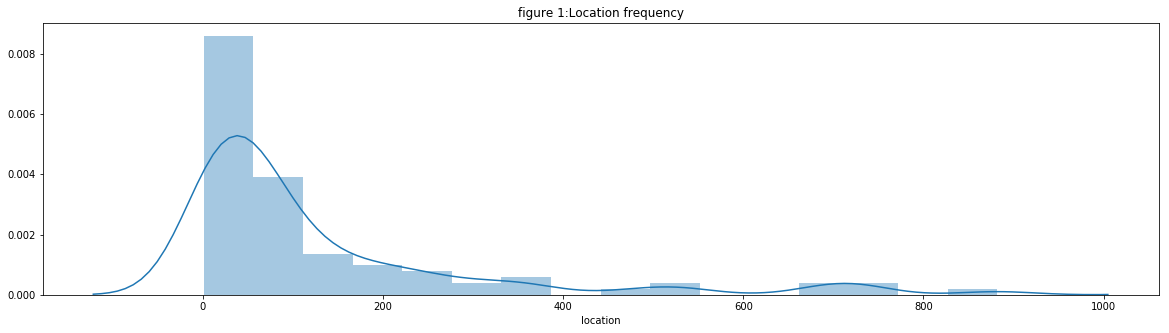

In [45]:
plt.figure(figsize=(20, 5))                               # Figure Size

ax = sns.distplot(location_frequency[location_cum_feq <= 100]) # Plot definition
plt.title("figure 1:Location frequency")                              # Plot title

plt.show()

__Remarks:__ So far as i understood, it is highly skewed. Restaurant are distributed largely in few locatilities. Even cum summation of location frequency talks about the same.

##### 2. Cost Analysis of locations:
We want to understand what is the pocket size of customers in these location. Let us look at:
1. Frequency of retaurants in different locations
2. Average Expenditure of a customer (for 2 people) per location


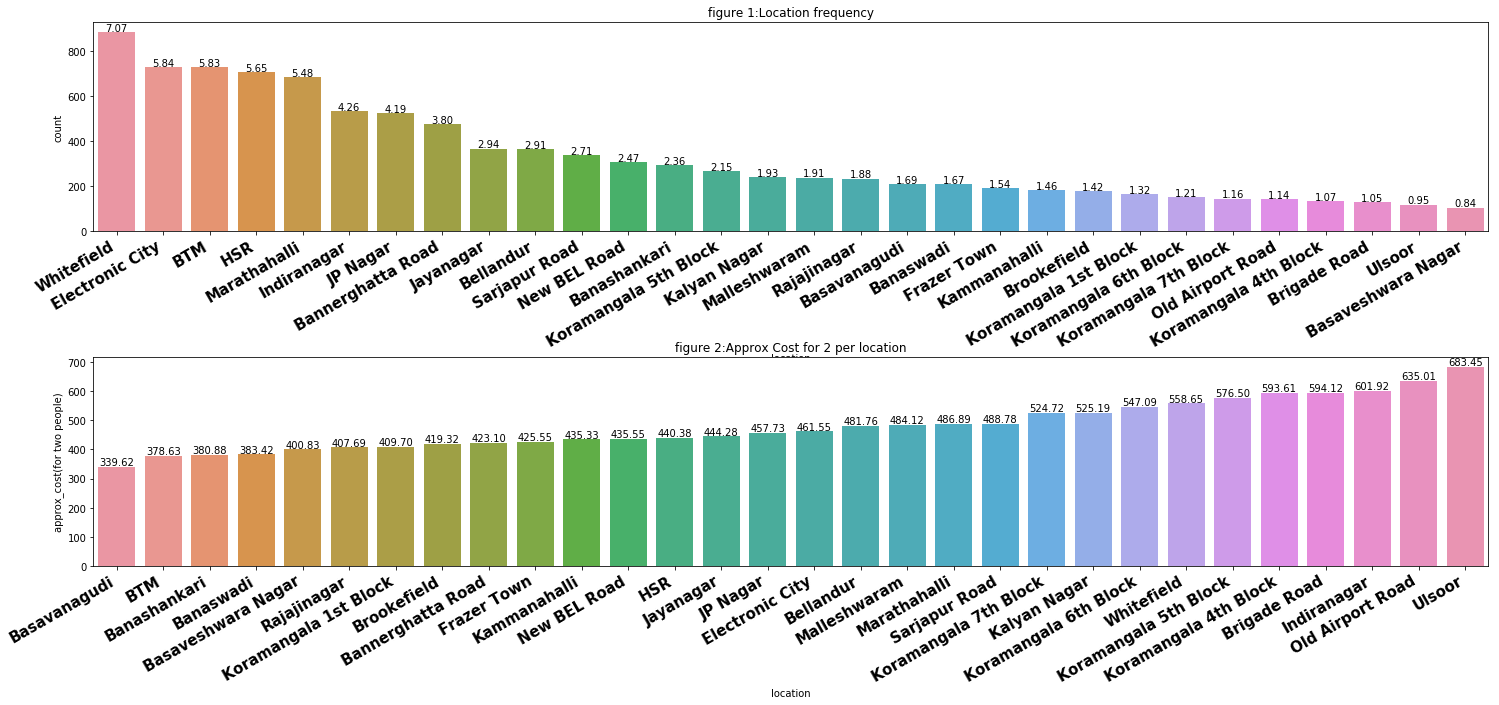

In [46]:
plt.figure(figsize=(25, 10))                               # Figure Size
plt.subplots_adjust(hspace=0.6)
plt.subplot(2,1,1)
ax = sns.countplot(x = 'location',data=df_zomato, order = location_frequency.iloc[0:30].index) # Plot definition
plt.title("figure 1:Location frequency")                              # Plot title

# Plot formatting adding % of each category data as bar index on top for understanding
total = float(len(df_zomato))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format((height/total)*100),          
            ha="center") 
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right",weight="bold",fontsize=15)


plt.subplot(2,1,2)

ax = sns.barplot(y = 'approx_cost(for two people)', x = 'location',data=df_zomato, 
                 order = df_dummy_mean_cost_top30_loc.index, ci = None) # Plot definition
plt.title("figure 2:Approx Cost for 2 per location")                              # Plot title

# Plot formatting adding % of each category data as bar index on top for understanding
total = float(len(df_zomato))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format(height),          
            ha="center") 
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right",weight="bold",fontsize=15)



plt.show()

__Remarks:__ Let us narrow down our analysis to top 10 locations (locations that cover 50% of all restaurants in benguluru)
1. Let us divide the mean cost per location to 3 bins (figure 2):
    1. Last 10 in figure 2: High cost per customer
    2. Middle 10 locations in figure 2: Medium cost per consumptions
    3. First 10 locations in figure 2: Low cost per consumptions


__Analysis:__ 
1. The lesser restaurant frequency locations have high cost per consumption. This might be due to the following reason
    1. There are more high end dine in places more, so average is biased to be more
    2. The customer segment is largely families and customers with high salary structures who go to dine ins or pubs ocasionnally
2. The more the frequency of restaurants, the mean consumer cost is between median to lower.
    1. The customer segment is mostly students and fresh graduates in new jobs or searching jobs living in PG's
    2. They largely cater to avail services of restaurants from fast food chains. 

3. Understanding `rest_types` in these locations will help narrow down more.


##### Feature extraction `restaurant type`
__Assumption:__ We assume the first type in rest_type column as the primary restaurant type. All other words are added to the rest_type to improve the search results in zomato. This might result in loss of some information. But it largely gives an idea of type of restaurants and their customer mean cost consumption habits.

#### Creating a new feature / column with `primary restaurant type`

In [47]:
# Converting object datatype to string
df_zomato['rest_type'] = df_zomato['rest_type'].astype(str)

In [48]:
# Creating a new column for restaurant types
for i in list(df_zomato.index):
    df_zomato.loc[i,'primary rest type'] = df_zomato.loc[i,'rest_type'].split(',')[0]

In [49]:
# look at the new column
df_zomato['primary rest type'].head(5)

0    Casual Dining
1    Casual Dining
2             Cafe
3      Quick Bites
4    Casual Dining
Name: primary rest type, dtype: object

In [50]:
# what are the unique categories of restaurant types
df_zomato['primary rest type'].unique()

array(['Casual Dining', 'Cafe', 'Quick Bites', 'Delivery', 'Mess',
       'Dessert Parlor', 'Bakery', 'Pub', 'Takeaway', 'Fine Dining',
       'Beverage Shop', 'Sweet Shop', 'Bar', 'Confectionery', 'Kiosk',
       'Food Truck', 'Microbrewery', 'Lounge', 'Food Court', 'Dhaba',
       'Club', 'Bhojanalya', 'Pop Up'], dtype=object)

##### Cost Analysis per location Continued
As part of cost analysis, let us look at 
1. Cost per restaurant type 
2. Frequency of Restaurant type in city

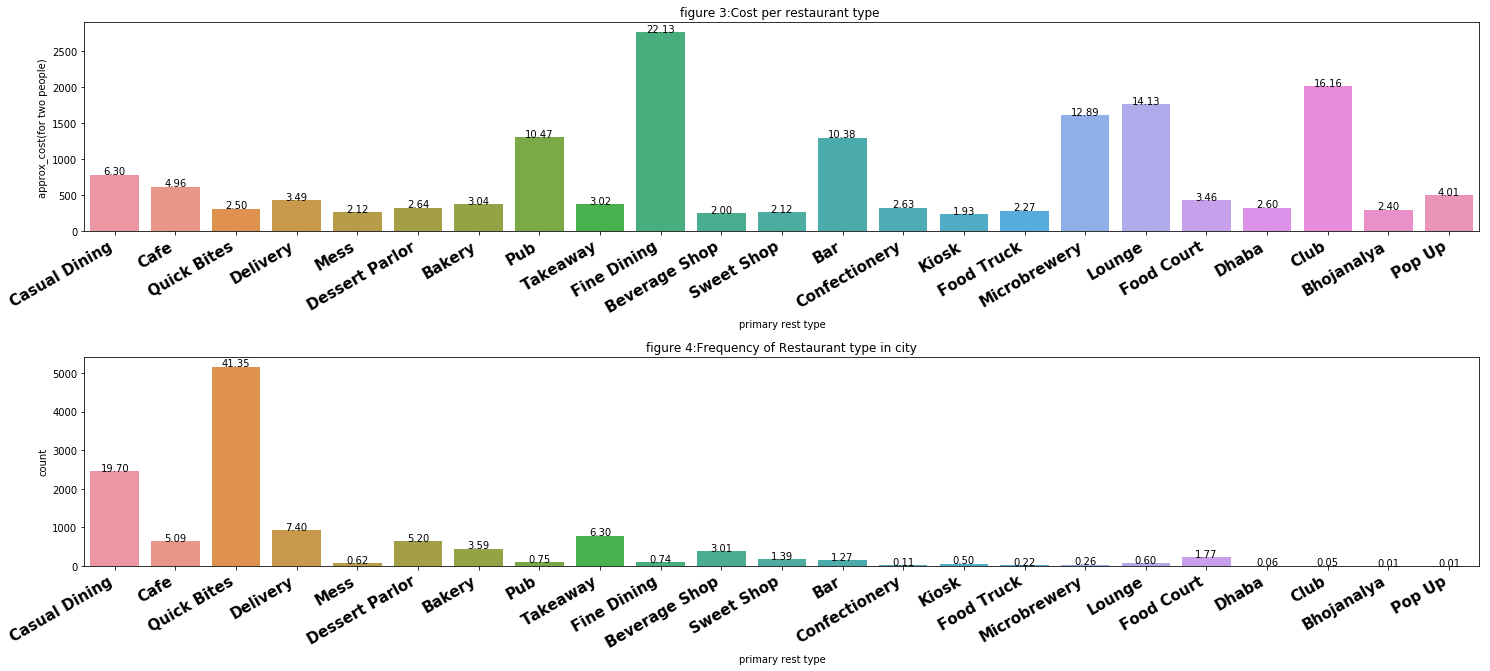

In [51]:
plt.figure(figsize=(25, 10))                               # Figure Size
# Cost per restaurant type
plt.subplots_adjust(hspace=0.6)
plt.subplot(2,1,1)
ax = sns.barplot(y = 'approx_cost(for two people)', x = 'primary rest type',data=df_zomato, ci = None) # Plot definition
plt.title("figure 3:Cost per restaurant type ")                              # Plot title

# Plot formatting adding % of each category data as bar index on top for understanding
total = float(len(df_zomato))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format((height/total)*100),          
            ha="center") 
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right",weight="bold",fontsize=15)

plt.subplot(2,1,2)
ax = sns.countplot( x = 'primary rest type',data=df_zomato) # Plot definition
plt.title("figure 4:Frequency of Restaurant type in city")                              # Plot title

# Plot formatting adding % of each category data as bar index on top for understanding
total = float(len(df_zomato))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format((height/total)*100),          
            ha="center") 
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right",weight="bold",fontsize=15)



plt.show()

In [52]:
# Frequency of restaurant types
rest_type_frequency = df_zomato['primary rest type'].value_counts().sort_values(ascending = False)
# Cumulative frequency of restaurant types
df_dummy_cum_frequency = 100 * rest_type_frequency.cumsum()/df_zomato.shape[0]
df_dummy_cum_frequency[df_dummy_cum_frequency <= 98]

Quick Bites       41.354167
Casual Dining     61.057692
Delivery          68.453526
Takeaway          74.751603
Dessert Parlor    79.951923
Cafe              85.040064
Bakery            88.629808
Beverage Shop     91.642628
Food Court        93.413462
Sweet Shop        94.799679
Bar               96.065705
Pub               96.810897
Fine Dining       97.548077
Name: primary rest type, dtype: float64

__Remarks:__
1. `Casual dining` is the only dining type which hold 20% market share in frequency where consumer pays a premium per visit.
2. Otherwise, Top 7 restaurant types cost per visit is not more than Rs. 500
3. The cumulative frequency of these budget friendly restaurants is as high as 80%

If we choose a bucket of restaurant type like `Quick Bites`, `Casual Dining`,`Delivery`,`Takeaway`,`Dessert Parlor` and look at the distribution of these restaurants across locations individually.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


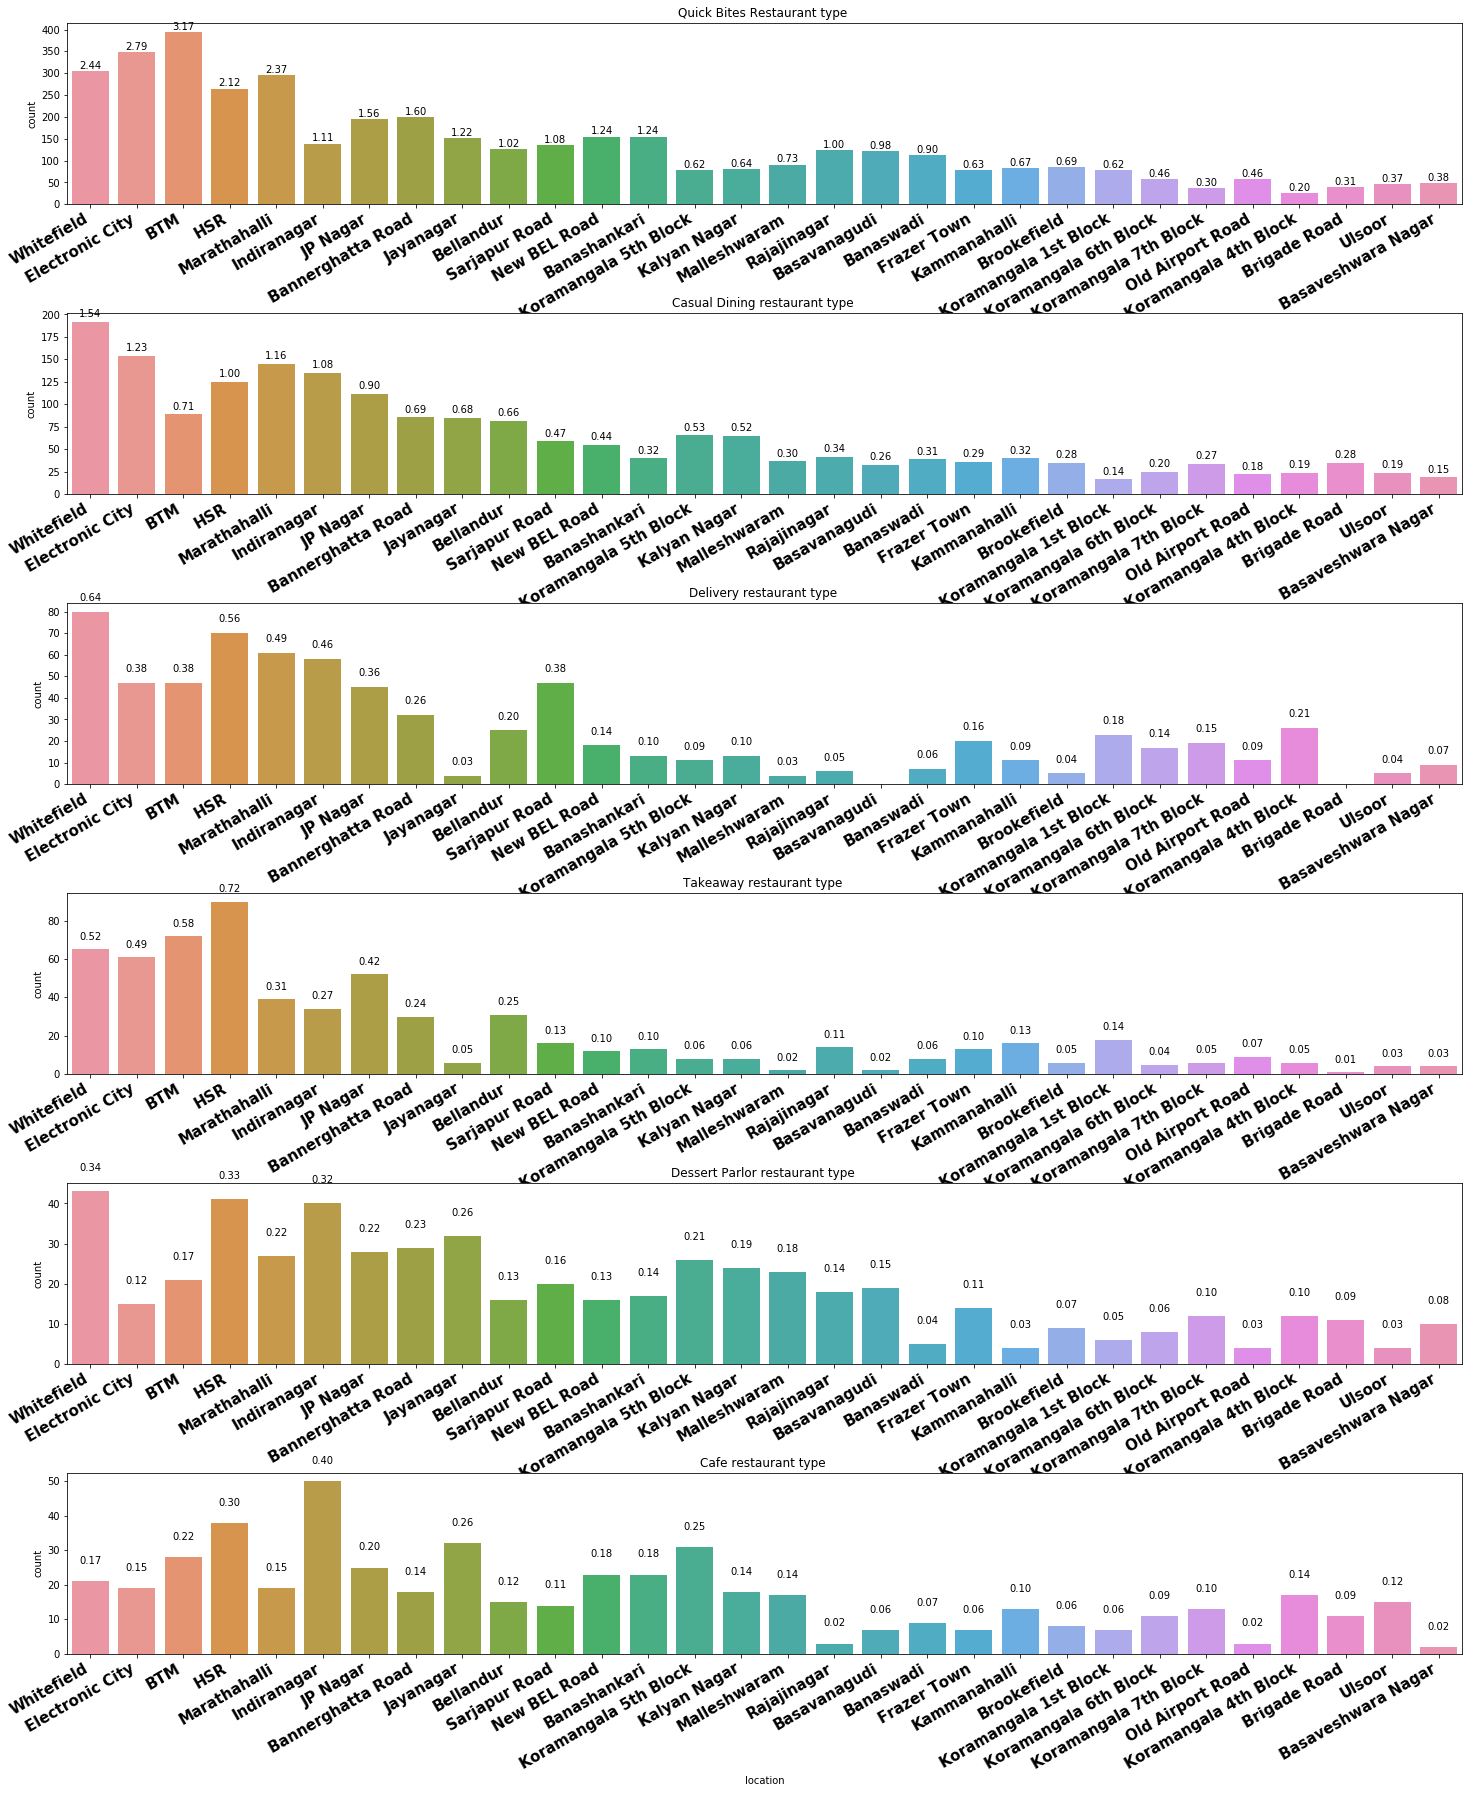

In [53]:
plt.figure(figsize=(25, 30))                               # Figure Size
plt.subplots_adjust(hspace=0.6)
plt.subplot(6,1,1)
ax = sns.countplot( x = 'location', order = location_frequency.iloc[0:30].index,
                   data=df_zomato.loc[df_zomato['primary rest type'] == 'Quick Bites'],) # Plot definition
plt.title("Quick Bites Restaurant type ")                              # Plot title

# Plot formatting adding % of each category data as bar index on top for understanding
total = float(len(df_zomato))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format((height/total)*100),          
            ha="center") 
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right",weight="bold",fontsize=15)

plt.subplot(6,1,2)
ax = sns.countplot( x = 'location', order = location_frequency.iloc[0:30].index,
                   data=df_zomato.loc[df_zomato['primary rest type'] == 'Casual Dining'],) # Plot definition
plt.title("Casual Dining restaurant type ")                              # Plot title

# Plot formatting adding % of each category data as bar index on top for understanding
total = float(len(df_zomato))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format((height/total)*100),          
            ha="center") 
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right",weight="bold",fontsize=15)

plt.subplot(6,1,3)
ax = sns.countplot( x = 'location', order = location_frequency.iloc[0:30].index,
                   data=df_zomato.loc[df_zomato['primary rest type'] == 'Delivery'],) # Plot definition
plt.title("Delivery restaurant type ")                              # Plot title

# Plot formatting adding % of each category data as bar index on top for understanding
total = float(len(df_zomato))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format((height/total)*100),          
            ha="center") 
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right",weight="bold",fontsize=15)

plt.subplot(6,1,4)
ax = sns.countplot( x = 'location', order = location_frequency.iloc[0:30].index,
                   data=df_zomato.loc[df_zomato['primary rest type'] == 'Takeaway'],) # Plot definition
plt.title("Takeaway restaurant type ")                              # Plot title

# Plot formatting adding % of each category data as bar index on top for understanding
total = float(len(df_zomato))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format((height/total)*100),          
            ha="center") 
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right",weight="bold",fontsize=15)


plt.subplot(6,1,5)
ax = sns.countplot( x = 'location', order = location_frequency.iloc[0:30].index,
                   data=df_zomato.loc[df_zomato['primary rest type'] == 'Dessert Parlor'],) # Plot definition
plt.title("Dessert Parlor restaurant type ")                              # Plot title

# Plot formatting adding % of each category data as bar index on top for understanding
total = float(len(df_zomato))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format((height/total)*100),          
            ha="center") 
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right",weight="bold",fontsize=15)

plt.subplot(6,1,6)
ax = sns.countplot( x = 'location', order = location_frequency.iloc[0:30].index,
                   data=df_zomato.loc[df_zomato['primary rest type'] == 'Cafe'],) # Plot definition
plt.title("Cafe restaurant type ")                              # Plot title

# Plot formatting adding % of each category data as bar index on top for understanding
total = float(len(df_zomato))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format((height/total)*100),          
            ha="center") 
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right",weight="bold",fontsize=15)




plt.show()

__Remarks:__
1. The restaurant types that are concentrated in the city are
    1. Quick Bites
    2. Casual Dining
    3. Cafe
    4. Dessert parlors
    5. Delivery
    6. Takeaways
2. The following locations constitute major chunk of frequently visited restaurant types
    1. Whitefield
    2. Electronic City
    3. BTM
    4. HSR
    5. Marthahalli

3. Since, We do not have a way to compute total revenues generated. We will stop looking at that part of cost analysis so far.


### Conclusion on choice of location :
From the entire analysis, it is evident that:
1. The 5 locations mentioned above has the highest concentration of restaurants.
2. Adding to that, the restaurants on these places largely cater to 
    - Customers who pay medium to low level average cost
3. Since the areas are largely corporate hubs and the nearest residential localities providing housing for these professionals. We can interpret from general knowledge that
    - These are mostly QSR space
    - Foot fall is frequent
    - Revenue typically comes from volumes
    - A small place is sufficient

4. HSR and Whitefield might be good spots for casual dining spots.

#### Since we know the consumers are more as well as frequent, we feel it still have need for one more restaurant. 

In [54]:
df_zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'primary rest type'],
      dtype='object')

#### 3.2. `Understanding Cuisine Types`
Let us work with the 
1. Major Cuisine types preferred across benguluru.
2. Cuisine type frequently preferred in the locations we chose.

To understand cuisine types, we will extract few features from the cuisines column. Typically any restaurant will cater multiple cuisine types in their menus to attract wider range of customers. All the cuisine types are given in one column. Let us extract:
1. Primary cuisine and Secondary Cuisine in 2 columns
2. Check the most frequent cuisines in the city
3. Analyze what are the cuisine types that are frequent choice to the customers in the locations we chose above

This choice of cuisine type will narrow down our restaurant type as well as our location further.

In [55]:
df_zomato['cuisines'].dtype
# Converting object datatype to string
df_zomato['cuisines'] = df_zomato['cuisines'].astype(str)

In [56]:
df_zomato['cuisines'].head()

0    North Indian, Mughlai, Chinese
1       Chinese, North Indian, Thai
2            Cafe, Mexican, Italian
3        South Indian, North Indian
4          North Indian, Rajasthani
Name: cuisines, dtype: object

##### Extracting primary and secondary cuisines as features

In [57]:
# Let us keep the top 3 cuisine types
for i in list(df_zomato.index):
    df_zomato.loc[i,'primary rest type'] = df_zomato.loc[i,'rest_type'].split(',')[0]

for i in list(df_zomato.index):
    df_zomato.loc[i,'primary cuisine'] = df_zomato.loc[i,'cuisines'].split(",")[0]
    if len(df_zomato.loc[i,'cuisines'].split(",")) > 1:
        df_zomato.loc[i,'secondary cuisine'] = df_zomato.loc[i,'cuisines'].split(",")[1]
    else: 
        df_zomato.loc[i,'secondary cuisine'] = 'No Value'
    
df_zomato[['cuisines','primary cuisine','secondary cuisine']].head()

,cuisines,primary cuisine,secondary cuisine
0,"North Indian, Mughlai, Chinese",North Indian,Mughlai
1,"Chinese, North Indian, Thai",Chinese,North Indian
2,"Cafe, Mexican, Italian",Cafe,Mexican
3,"South Indian, North Indian",South Indian,North Indian
4,"North Indian, Rajasthani",North Indian,Rajasthani


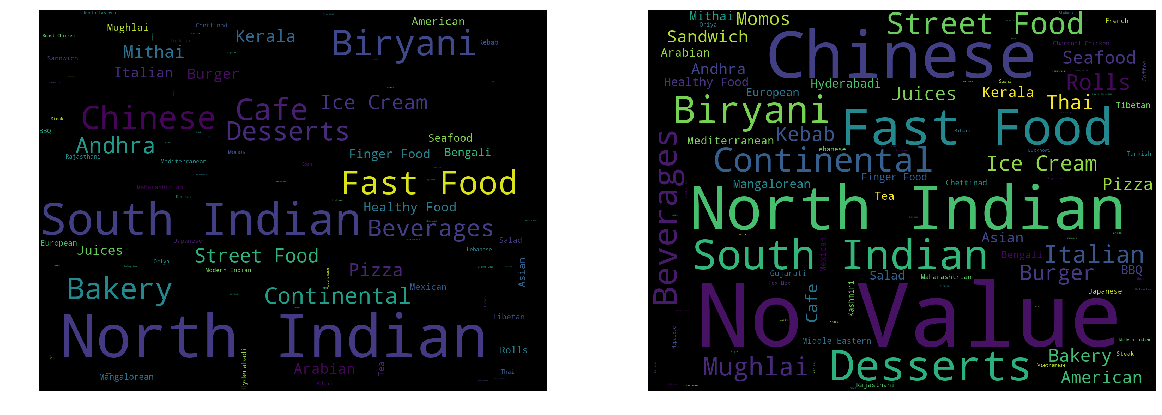

In [58]:
# Frequent Cuisine types
from subprocess import check_output
from wordcloud import WordCloud
wordcloud_1 = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df_zomato['primary cuisine'].value_counts()))
wordcloud_2 = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df_zomato['secondary cuisine'].value_counts()))

plt.figure(1,figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(wordcloud_1)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wordcloud_2)
plt.axis('off')

plt.show()

__Remarks:__ These are the primary and secondary cuisine types that are famous across all locations.
1. Primarily, the cusuine types that are customers choice are:
    1. North Indian
    2. South Indian
    3. Biryani
    4. All sorts of dessert places including bakery, ice creams and cafes
2. It looks like `Chineese` and `Beverages` are the cuisine types restaurants are offering in addition to the primary types.
3. We narrowed down to 5 locations earlier. So let us see what are peoples preferences in each location.

#### Analyzing location wise cuisine offerings

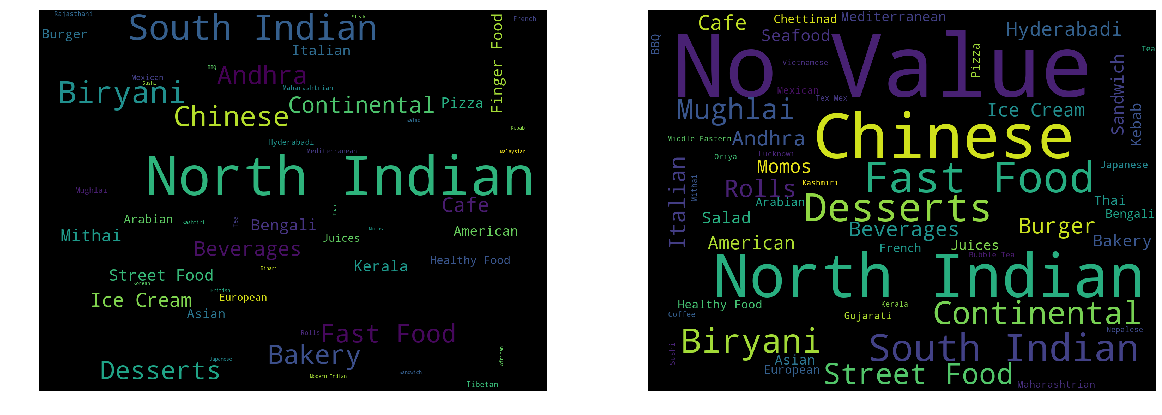

In [59]:
# Frequent Cuisine types -  White Field
from subprocess import check_output
from wordcloud import WordCloud
wordcloud_1 = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df_zomato['primary cuisine'].loc[df_zomato['location'] == 'Whitefield'].value_counts()))
wordcloud_2 = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df_zomato['secondary cuisine'].loc[df_zomato['location'] == 'Whitefield'].value_counts()))

plt.figure(1,figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(wordcloud_1)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wordcloud_2)
plt.axis('off')

plt.show()

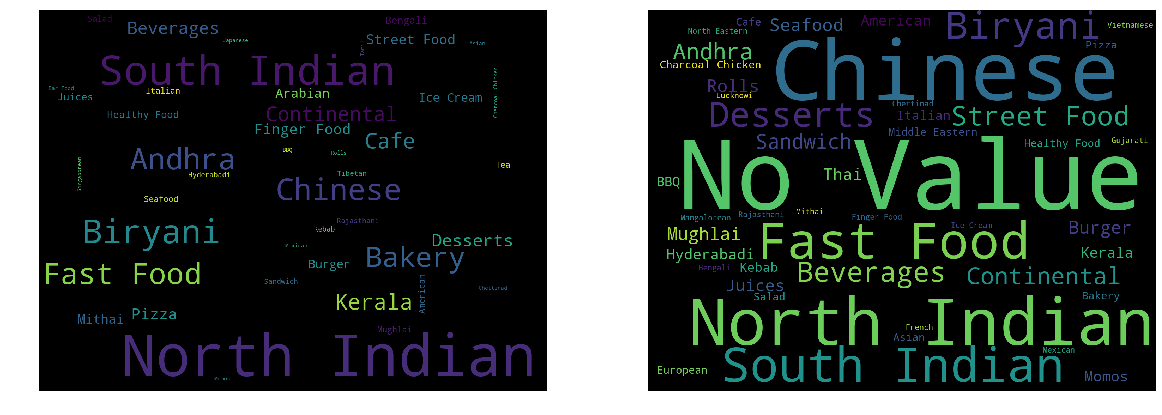

In [60]:
# Frequent Cuisine types -  Electronic City
from subprocess import check_output
from wordcloud import WordCloud
wordcloud_1 = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df_zomato['primary cuisine'].loc[df_zomato['location'] == 'Electronic City'].value_counts()))
wordcloud_2 = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df_zomato['secondary cuisine'].loc[df_zomato['location'] == 'Electronic City'].value_counts()))

plt.figure(1,figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(wordcloud_1)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wordcloud_2)
plt.axis('off')

plt.show()

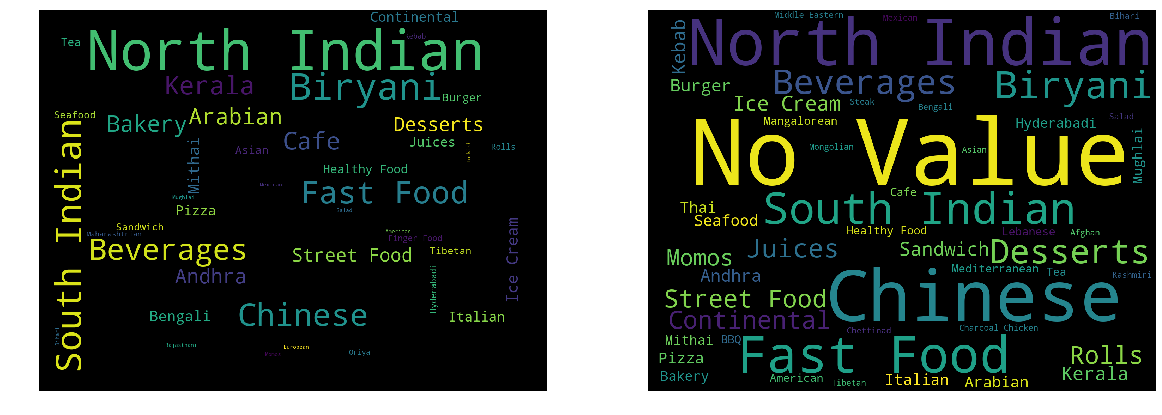

In [61]:
# Frequent Cuisine types -  BTM
from subprocess import check_output
from wordcloud import WordCloud
wordcloud_1 = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df_zomato['primary cuisine'].loc[df_zomato['location'] == 'BTM'].value_counts()))
wordcloud_2 = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df_zomato['secondary cuisine'].loc[df_zomato['location'] == 'BTM'].value_counts()))

plt.figure(1,figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(wordcloud_1)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wordcloud_2)
plt.axis('off')

plt.show()

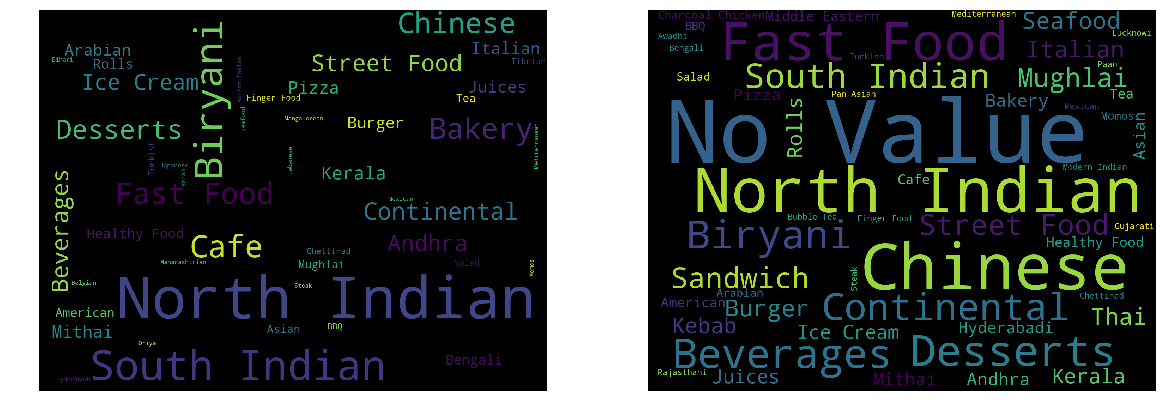

In [62]:
# Frequent Cuisine types -  HSR
from subprocess import check_output
from wordcloud import WordCloud
wordcloud_1 = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df_zomato['primary cuisine'].loc[df_zomato['location'] == 'HSR'].value_counts()))
wordcloud_2 = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df_zomato['secondary cuisine'].loc[df_zomato['location'] == 'HSR'].value_counts()))

plt.figure(1,figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(wordcloud_1)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wordcloud_2)
plt.axis('off')

plt.show()

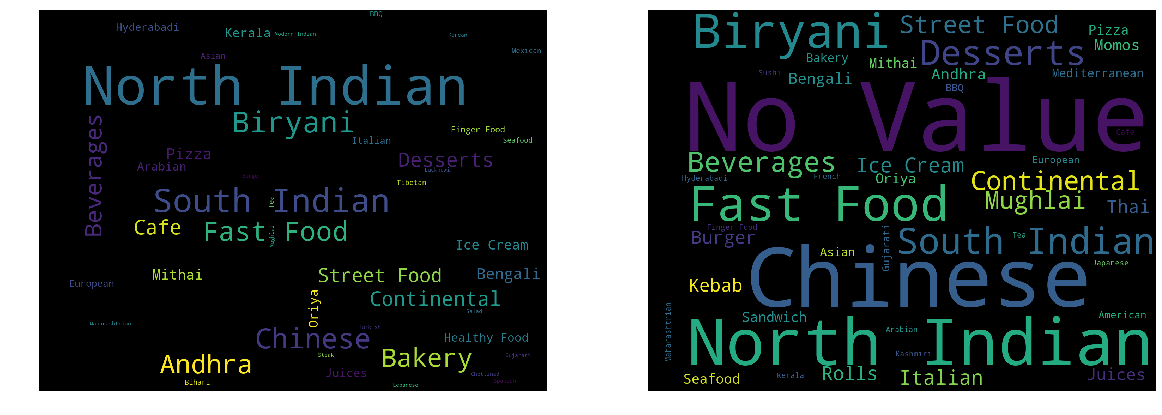

In [63]:
# Frequent Cuisine types -  Marathahalli
from subprocess import check_output
from wordcloud import WordCloud
wordcloud_1 = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df_zomato['primary cuisine'].loc[df_zomato['location'] == 'Marathahalli'].value_counts()))
wordcloud_2 = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df_zomato['secondary cuisine'].loc[df_zomato['location'] == 'Marathahalli'].value_counts()))

plt.figure(1,figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(wordcloud_1)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wordcloud_2)
plt.axis('off')

plt.show()

__Remarks:__
__As Primary Cuisine:__
1. Clearly, north indian cuisine is the winner followed by south indian and biryani
2. Most places offer primarily north indian.
3. Locations - Whitefield and Marathalli: Have more restaurants offering also `Andhra` and `bakery` cuisine types
4. Locations - HSR, BTM and south indian: Have more fast food joints including bakery and cafes and similar cuisine offerings

__As Secondary Cuisine:__
1. Unanimously Chineese is the winner.

#### Conclusions:
1. It is a good idea to have atleast 2 cuisines
2. One of the North Indian, South Indian cuisines with chineese as a secondary cuisine is an evident offering.
3. Biryani and Mughlai can be a combination to offer (these restaurants specialize in non veg)
4. Cafe or similar places would include all types of desserts, coffee , continental as secondary offerings would be great.
5. These are the highlighted offerings.

#### Analyzing restaurant types and cuisine offerings

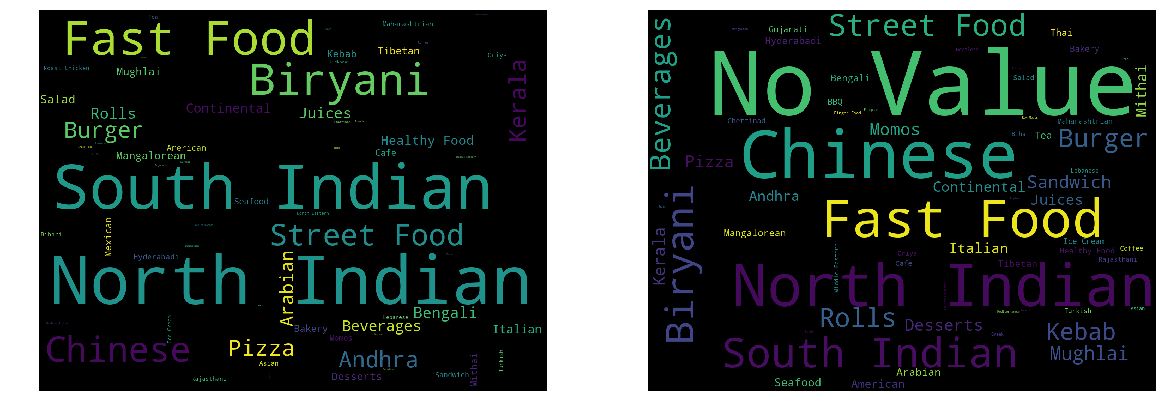

In [64]:
# Frequent restaurant types -  Quick Bites
from subprocess import check_output
from wordcloud import WordCloud
wordcloud_1 = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df_zomato['primary cuisine'].loc[df_zomato['primary rest type'] == 'Quick Bites'].value_counts()))
wordcloud_2 = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df_zomato['secondary cuisine'].loc[df_zomato['primary rest type'] == 'Quick Bites'].value_counts()))

plt.figure(1,figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(wordcloud_1)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wordcloud_2)
plt.axis('off')

plt.show()

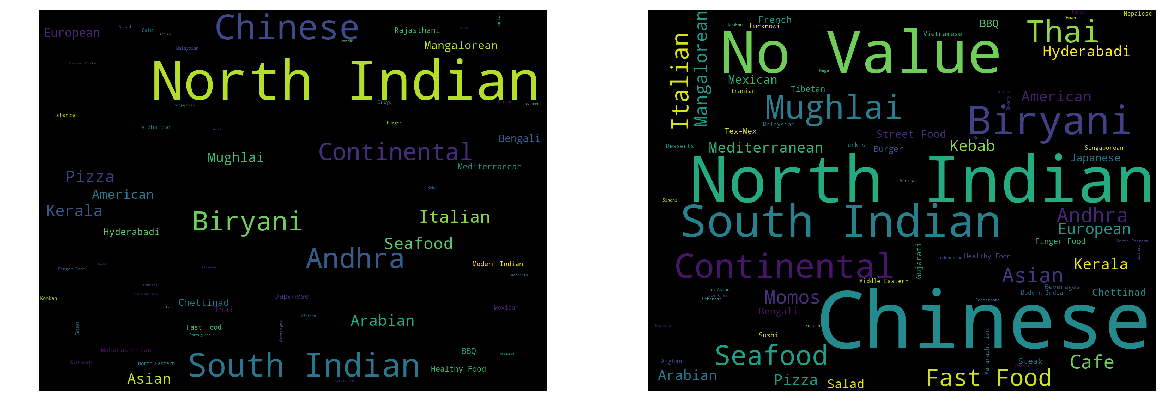

In [65]:
# Frequent restaurant types -  Casual Dining
from subprocess import check_output
from wordcloud import WordCloud
wordcloud_1 = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df_zomato['primary cuisine'].loc[df_zomato['primary rest type'] == 'Casual Dining'].value_counts()))
wordcloud_2 = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df_zomato['secondary cuisine'].loc[df_zomato['primary rest type'] == 'Casual Dining'].value_counts()))

plt.figure(1,figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(wordcloud_1)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wordcloud_2)
plt.axis('off')

plt.show()

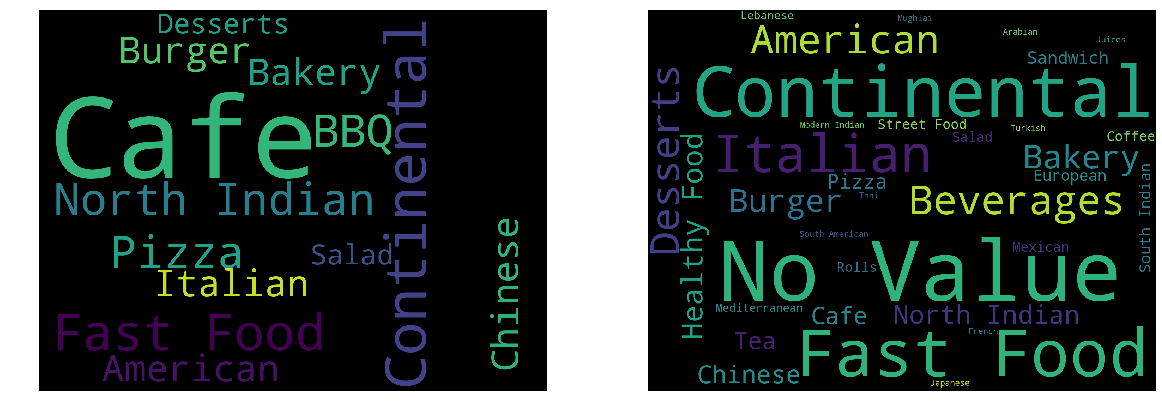

In [66]:
# Frequent restaurant types -  Cafe
from subprocess import check_output
from wordcloud import WordCloud
wordcloud_1 = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df_zomato['primary cuisine'].loc[df_zomato['primary rest type'] == 'Cafe'].value_counts()))
wordcloud_2 = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df_zomato['secondary cuisine'].loc[df_zomato['primary rest type'] == 'Cafe'].value_counts()))

plt.figure(1,figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(wordcloud_1)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wordcloud_2)
plt.axis('off')

plt.show()

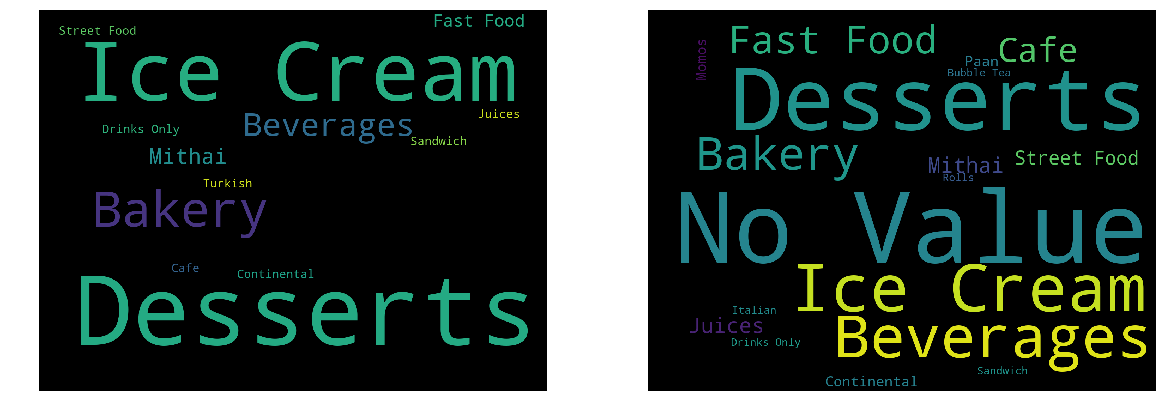

In [67]:
# Frequent restaurant types -  Dessert parlor
from subprocess import check_output
from wordcloud import WordCloud
wordcloud_1 = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df_zomato['primary cuisine'].loc[df_zomato['primary rest type'] == 'Dessert Parlor'].value_counts()))
wordcloud_2 = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df_zomato['secondary cuisine'].loc[df_zomato['primary rest type'] == 'Dessert Parlor'].value_counts()))

plt.figure(1,figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(wordcloud_1)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wordcloud_2)
plt.axis('off')

plt.show()

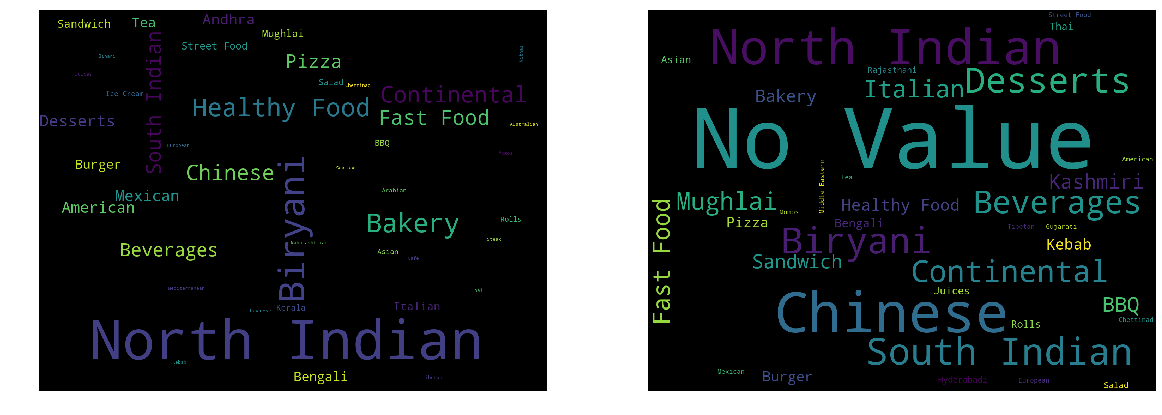

In [68]:
# Frequent restaurant types -  Delivery
from subprocess import check_output
from wordcloud import WordCloud
wordcloud_1 = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df_zomato['primary cuisine'].loc[df_zomato['primary rest type'] == 'Delivery'].value_counts()))
wordcloud_2 = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df_zomato['secondary cuisine'].loc[df_zomato['primary rest type'] == 'Delivery'].value_counts()))

plt.figure(1,figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(wordcloud_1)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wordcloud_2)
plt.axis('off')

plt.show()

In [69]:
df_zomato['primary rest type'].unique()

array(['Casual Dining', 'Cafe', 'Quick Bites', 'Delivery', 'Mess',
       'Dessert Parlor', 'Bakery', 'Pub', 'Takeaway', 'Fine Dining',
       'Beverage Shop', 'Sweet Shop', 'Bar', 'Confectionery', 'Kiosk',
       'Food Truck', 'Microbrewery', 'Lounge', 'Food Court', 'Dhaba',
       'Club', 'Bhojanalya', 'Pop Up'], dtype=object)

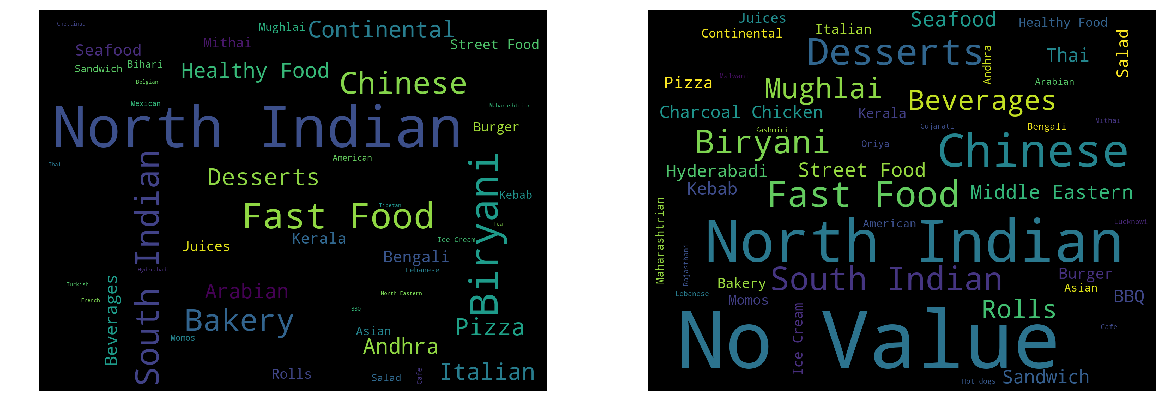

In [70]:
# Frequent restaurant types -  Takeaway
from subprocess import check_output
from wordcloud import WordCloud
wordcloud_1 = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df_zomato['primary cuisine'].loc[df_zomato['primary rest type'] == 'Takeaway'].value_counts()))
wordcloud_2 = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df_zomato['secondary cuisine'].loc[df_zomato['primary rest type'] == 'Takeaway'].value_counts()))

plt.figure(1,figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(wordcloud_1)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wordcloud_2)
plt.axis('off')

plt.show()

#### Conclusions 2:
1. Cafes and Desert parlors are similar and offer similar offerings. But all the locations of our choice cater less of these. Let us ignore them at this point. 
2. We have been left with Takeaway, deliveries, casual dining and Quick Bite options.
3. In all these 4 categories, the clear winners are these 4 types of cuisines 
    1. North Indian leads the way
    2. South indian follows it
    3. Chineese accompanies it
    4. Biryani is an evident customers choice

### Recommendations:
The demographics suggest that these places cater corporate professional who dine outside on a regular basis. It is evident that they choose their regular choice of cuisine to be indian in general and north indian and south indian in specific. 
1. In general, North Indian food prices high per plate.
2. For a breakfast place, south indian is a famous choice.

We would recommend to take either of the following cuisine selections
1. North Indian cuisine with dine in and delivery options adding chineese to the menu
2. South indian low cost breakfast joints with delivery options.
3. Biryani takeaway and delivery is one of the option

These are only few recommendations based on the work.


__Note:__ We did not do any analysis on which reataurant type. So in the recommendations, adding dini in, delivery and breakfast is to convey psychographic nature of customer. There is no basis for these.


### Directions to look in future:
1. After selecting the location and the food we want to cater, We can further narrow down the restaurant type by analysing choice of restaurant with respect to locations.
2. We can further extend to make a choice of menu
3. If we can add, overall footfall per day data to it, it is easy to understand the revenue of the restaurants which can evidently make more precise recommendations.

<h2 align="center"> <font color = green> Problem Statements: 3 - Predicting Rank from Reviews </font></h2>


In this problem statement, We are asked to predict rank the restaurants using the existing set of
reviews. The 2 columns that closely associate with solving this problem are:
1. `reviews_list`
2. `rate`

### Step 1: `Extract the columns into new dataframe`

In [71]:
# Extracting reviews and rate into another dataframe
df_new = df_zomato[['reviews_list','rate']]

### Step 2: `Inspect the dataframe`

In [72]:
df_new.head()

,reviews_list,rate
0,"[(Rated 4.0, RATED\n A beautiful place to din...",4.1
1,"[(Rated 4.0, RATED\n Had been here for dinner...",4.1
2,"[(Rated 3.0, RATED\n Ambience is not that goo...",3.8
3,"[(Rated 4.0, RATED\n Great food and proper Ka...",3.7
4,"[(Rated 4.0, RATED\n Very good restaurant in ...",3.8


In [73]:
# Info of the dataframe
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12480 entries, 0 to 12498
Data columns (total 2 columns):
reviews_list    12480 non-null object
rate            12480 non-null object
dtypes: object(2)
memory usage: 612.5+ KB


In [74]:
df_new.describe()

,reviews_list,rate
count,12480,12480
unique,9961,88
top,[],0
freq,2497,2480


__Remarks:__ Here is an interesting observation. 
1. `reviews_list` is a combination of different texts. But observe the unique text reviews. Unique reviews are less than the actual dataset. This strikes an alarm saying that there are exactly same reviews. The reson might be:
    1. There is a food chain restaurant whose reviews at different locations are clubbed together. 

2. The above analysis is just a hypothesis. At this point, we are not working with this hypothesis.

__Note:__ While solving this problem statement, our focus will mainly be on
1. Converting ratings to rank
2. Cleaning review list
3. Combining set of reviews into single string
4. Vectorization (Yet to choose between BoW model and Word2Vec)
5. Using different ML models

#### Step 3: `Converting Ratings to Rank`
The rates are float point numbers. While classification problems take float point numbers. I want to convert them to integer numbers.

In [75]:
# Convert rate to float
df_new['rate'] = df_new['rate'].astype(float)

In [76]:
# Sort the unique values of rate
list_rate_unique = list(df_new['rate'].unique())
list_rate_unique = sorted(list_rate_unique, reverse = True)


In [77]:
df_new['rank'] = df_new['rate']

In [78]:
# Make a dictionary of ranks from 1 - 38 for unique values in rate between 5 to 0.
dict_temp = {}
list_range = list(range(1,len(list_rate_unique)+1))
for i in (range(0,len(list_rate_unique))):
    dict_temp[list_rate_unique[i]] = list_range[i]
#dict_temp

In [79]:
df_new['rank'] = df_new['rank'].map(dict_temp)

In [80]:
# Distribution of ranks
distributions_ranks = round(100*df_new['rank'].value_counts()/df_new.shape[0],1)
distributions_ranks.sort_values(ascending = False)[0:20]

38    19.9
14     7.3
12     6.9
13     6.7
15     6.4
11     6.1
16     5.8
17     5.2
18     5.0
19     4.3
10     4.1
20     3.4
21     2.9
9      2.8
8      2.1
22     1.8
1      1.4
7      1.3
23     1.3
37     1.0
Name: rank, dtype: float64

#### Percentage of data in each rank is highly biased. After vectorization, we will increase data and try to reduce the imbalance.

__Remarks:__ Typically, we skip ranks in between while multiple people have same ranks but for simplicity, we gave clustered ranking continuously.

#### Step 4: `Combine and convert list of reviews to strings`

In [81]:
dict_temp_1 = {}
for i in list(df_new.index):
    dummy_list = []
    for j in list(df_zomato.loc[i,'reviews_list']):
        dummy_list.append(j[1].split('\n ')[-1])
        string_dummy = ".".join(dummy_list)
    dict_temp_1[i] = string_dummy

In [82]:
# Convert reviews to strings and take it in dataframe
df_new['only review 1'] = df_new.index.map(dict_temp_1)

In [83]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12480 entries, 0 to 12498
Data columns (total 4 columns):
reviews_list     12480 non-null object
rate             12480 non-null float64
rank             12480 non-null int64
only review 1    12480 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 807.5+ KB


In [84]:
# Let us drop reviews_list and rate for now
df_new.drop(['reviews_list','rate'], axis = 1 ,inplace = True)

In [85]:
df_new['only review 1'].dtype

dtype('O')

In [86]:
aa = np.dtype(df_new['only review 1'])

In [87]:
aa.name

'object'

#### Step 5: `Train test split` 

In [88]:
### 
import nltk
from nltk.corpus import stopwords 
# Making a list of english stop words
stop_words = stopwords.words('english') 

In [89]:
from numpy import array
from scipy.sparse import csr_matrix


# Import train test split library from sklearn
from sklearn.model_selection import train_test_split

# Assign x and y variables
X = df_new.loc[:,'only review 1'].values
y = df_new.loc[:,'rank']

In [90]:
type(X[0:10])

numpy.ndarray

In [91]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [92]:
X_train.dtype

dtype('O')

### Step 6:  `Vectorization using Tfidf`
At this point, feature extraction from text will be a very tedious process. We can control extraction with human intervention like
1. Removing stop words
2. Adding more stop words to the repository
3. Making a vocabulary and controlling the feature extraction environment
4. Performing stemming and lemmatization techniques.

For NLP, feature extraction is an extremely tedious work. The better the extraction, the better the accuracy. We can either do them independently or use sci-kit learn library for creating `bag of Words` model using Count, Tfidf or Hash vectorizers.

My personal favourite is `Tfidf vectorizer`. It controlls the features from having
1. Most frequent tokens,`max_df`: max_df controls additional stop words if any (because they are the most repeated words)
2. Very less frequent tokens,`min_df`: min_df controls typo errors and ocassionally used vocabulary
3. I chose to use the stop words argument to remove stop words.
4. I am keeping n_gram = 1. This becomes a limitation when we remove available `english` stop words in NLTK corpus.

Let us 


In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Using default tokenizer in Tfidf tokenizer
tfidf = TfidfVectorizer(stop_words=stop_words, 
                        min_df = 0.25, 
                        max_df = 0.7)

X_train1 = tfidf.fit_transform(X_train)
X_test1 = tfidf.transform(X_test)
Vectorized_text_df_train = pd.DataFrame(X_train1.todense(),columns = tfidf.get_feature_names())
Vectorized_text_df_test = pd.DataFrame(X_test1.todense(),columns = tfidf.get_feature_names())

In [94]:
X_train1.shape

(9984, 61)

In [95]:
Vectorized_text_df_train.columns.values

array(['also', 'amazing', 'ambience', 'awesome', 'bad', 'best', 'better',
       'chicken', 'decent', 'definitely', 'delicious', 'delivery', 'even',
       'experience', 'fresh', 'friendly', 'get', 'go', 'got', 'great',
       'items', 'like', 'little', 'love', 'loved', 'made', 'menu',
       'money', 'much', 'must', 'never', 'nice', 'one', 'order',
       'ordered', 'overall', 'people', 'price', 'quality', 'quantity',
       'quick', 'quite', 'really', 'recommend', 'restaurant', 'rice',
       'served', 'service', 'small', 'staff', 'taste', 'tasted', 'tasty',
       'time', 'tried', 'try', 'veg', 'visit', 'well', 'worth', 'would'],
      dtype=object)

__Remarks:__ 
1. The key element of any text analytics problem is capturing the right sentiment. 
    1. Negative words capture negative feedback decreasing the rank
    2. Positive words denote positive feedback
2. From the columns, it is evident that every word attributes some kind of sentiment. We might be missing on a few. But these features are good.
3. We tuned it with
    1. min_df range : 0.1:0.35 with step 0.05
    2. max_df range : 0.5:0.9 with step 0.05
4. The parameters 0.25 and 0.7 sounded optimal with no additional words.


In [96]:
Vectorized_text_df_train.head()

,also,amazing,ambience,awesome,bad,best,better,chicken,decent,definitely,...,tasted,tasty,time,tried,try,veg,visit,well,worth,would
0,0.201746,0.259453,0.247244,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0000
1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.605018,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0000
2,0.097818,0.251595,0.000000,0.0,0.133884,0.214365,0.0,0.319678,0.275732,0.0,...,0.0,0.000000,0.000000,0.0,0.098956,0.0,0.0,0.219878,0.000000,0.2283
3,0.000000,0.000000,0.000000,0.0,0.000000,0.292280,0.0,0.000000,0.000000,0.0,...,0.0,0.315674,0.000000,0.0,0.269845,0.0,0.0,0.000000,0.349233,0.0000
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.624132,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0000


### 5.2 `Synthetic Minority Over-Sampling Technique - SMOTE MODELING`
Smote uses similar data to balance datasets rather than boot strapping where duplicates are created. Observe that, we are `performing smote modeling only on train data`. 

__Reason:__ We only need balanced data set for training the model estimates. There is no point in using the SMOTE before split.

In [97]:
# Let us have a look at y_train value counts before performing SMOTE
print('Pre Smote Value Count Percentage for each rank')
100 * y_train.value_counts()/ y_train.shape[0]

Pre Smote Value Count Percentage for each rank


38    19.861779
14     7.351763
12     6.901042
13     6.630609
15     6.500401
11     5.949519
16     5.849359
17     5.268429
18     4.907853
19     4.397035
10     4.056490
20     3.365385
9      2.844551
21     2.844551
8      2.143429
22     1.822917
1      1.382212
7      1.302083
23     1.181891
37     0.971554
6      0.941506
24     0.791266
25     0.470753
31     0.390625
5      0.390625
26     0.370593
4      0.260417
27     0.220353
28     0.170272
3      0.150240
2      0.080128
29     0.080128
34     0.060096
32     0.030048
36     0.020032
30     0.020032
33     0.010016
35     0.010016
Name: rank, dtype: float64

__Remarks:__ It is evident that few ranks are very less while few are more. particularly there are more restaurants ranking zero. So, we plan to perform SMOTE to create more realizations of outcomes and balance the dataset. So that model gets enough training.

In [98]:
from imblearn.over_sampling import BorderlineSMOTE
smt = BorderlineSMOTE(m_neighbors=2, k_neighbors=2)
x_train2, y_train = smt.fit_sample(X_train1, y_train)

In [99]:
y_df = pd.Series(y_train)

In [100]:
y_df.head()

0    12
1    25
2    18
3    38
4    38
dtype: int64

In [101]:
# Check for class imbalace after smote
print('Pre Smote Value Count Percentage for each rank')
100 * y_df.value_counts()/ y_df.shape[0]

Pre Smote Value Count Percentage for each rank


31    3.224495
14    3.224495
1     3.224495
34    3.224495
3     3.224495
4     3.224495
5     3.224495
37    3.224495
6     3.224495
38    3.224495
7     3.224495
8     3.224495
9     3.224495
10    3.224495
11    3.224495
13    3.224495
12    3.224495
15    3.224495
22    3.224495
28    3.224495
27    3.224495
26    3.224495
25    3.224495
16    3.224495
23    3.224495
24    3.224495
21    3.224495
20    3.224495
19    3.224495
18    3.224495
17    3.224495
2     0.013009
29    0.013009
32    0.004878
36    0.003252
30    0.003252
35    0.001626
33    0.001626
dtype: float64

In [102]:
y_df.shape

(61498,)

In [103]:
class_percent = 100 * y_df.value_counts()/ y_df.shape[0]
class_percent.tail(7)

2     0.013009
29    0.013009
32    0.004878
36    0.003252
30    0.003252
35    0.001626
33    0.001626
dtype: float64

__Remarks:__ SMOTE was able to pick up almost everything. But the ranks with class presence of less than 1%. It further declined the presence. In one way, for very low class data, the accuracy will be poor. But if you observe carefully, the classes with low class are largely in range 29-35. This is a rank allocation issue. A better way of endorsing ranks would have dealt with it. For time being, we will leave it as it is.

## MODELING
We are planning to take 2 Machine learning models to work on the problem
1. multinomialNaive: NaiveBayes because its simple at computing
2. SVC : because it is ideal to capture non linear classification

Limitations: 
1. In the resources I checked, SVC is supposed to be best for binary or a few multinomial classification
2. We tried it and it is computationally intensive, hence stopped it in the middle


### Naive Bayes

In [104]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


NB = MultinomialNB()
gs = GridSearchCV(NB,
    param_grid=[{'alpha': [0.1, 0.4, 0.7,0.9], 'fit_prior': [True, False]}],
    cv= 5,                 
    scoring='accuracy',
    n_jobs= 1,
    verbose=1,
    refit=True,
    return_train_score = True)

In [105]:
# Fit the Model
NB_model = gs.fit(x_train2, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    4.1s finished


In [106]:
# cv results
cv_results = pd.DataFrame(NB_model.cv_results_)
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'param_fit_prior', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [107]:
# Get the important columns out
cv_results_important = cv_results[['param_alpha', 'param_fit_prior',
                                   'mean_train_score','std_train_score',
                                   'mean_test_score','std_test_score',
                                   'rank_test_score']]
cv_results_important.sort_values('rank_test_score').head()

,param_alpha,param_fit_prior,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
0,0.1,True,0.420833,0.009320,0.416030,0.027606,1
2,0.4,True,0.420243,0.009180,0.415347,0.027461,2
4,0.7,True,0.419731,0.009288,0.414696,0.027307,3
6,0.9,True,0.419442,0.009278,0.414469,0.027376,4
7,0.9,False,0.411548,0.010784,0.406485,0.025524,5


In [108]:
# printing the optimal accuracy score and hyperparameters
best_score = NB_model.best_score_
best_hyperparams = NB_model.best_params_

print("The best test score is {0} corresponding to hyperparameters {1} for NaiveBayes".format(best_score, best_hyperparams))

The best test score is 0.4160297895866532 corresponding to hyperparameters {'alpha': 0.1, 'fit_prior': True} for NaiveBayes


In [109]:
# Fit the model with best hyper parameters
# specify optimal hyperparameters

# model
NB_main = MultinomialNB(alpha = 0.1, fit_prior = True)
NB_final = NB_main.fit(x_train2, y_train)

In [110]:
## # Predict the results on x_train
predict_train = NB_final.predict(x_train2)

# Predict the results on x_test
predict_test = NB_final.predict(X_test1)

#### Compare and Analyse the `Classification Report for Train and Test Data`

In [111]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Check results for train data
print(classification_report(y_train, predict_train))

              precision    recall  f1-score   support

           1       0.52      0.65      0.58      1983
           2       0.00      0.00      0.00         8
           3       0.50      0.87      0.64      1983
           4       0.66      0.98      0.79      1983
           5       0.52      0.88      0.65      1983
           6       0.27      0.34      0.30      1983
           7       0.34      0.65      0.45      1983
           8       0.25      0.18      0.21      1983
           9       0.39      0.26      0.31      1983
          10       0.27      0.31      0.29      1983
          11       0.15      0.05      0.07      1983
          12       0.15      0.07      0.10      1983
          13       0.17      0.07      0.09      1983
          14       0.15      0.10      0.12      1983
          15       0.20      0.12      0.15      1983
          16       0.21      0.16      0.18      1983
          17       0.13      0.04      0.07      1983
          18       0.15    

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


__Remarks:__ As we expected, the classes that are undersampled by SMOTE have 0% accuracy. Even overall, Naive Bayes is not an impressive performer.

In [112]:
# Check results for test data
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           1       0.09      0.30      0.13        40
           2       0.00      0.00      0.00         1
           3       0.01      0.67      0.03         3
           4       0.00      0.00      0.00         5
           5       0.01      0.12      0.02         8
           6       0.02      0.08      0.03        26
           7       0.07      0.17      0.10        35
           8       0.14      0.18      0.16        50
           9       0.07      0.07      0.07        60
          10       0.08      0.10      0.09       102
          11       0.11      0.04      0.05       169
          12       0.06      0.03      0.04       167
          13       0.07      0.02      0.03       169
          14       0.10      0.05      0.06       176
          15       0.05      0.02      0.03       151
          16       0.14      0.08      0.10       144
          17       0.05      0.03      0.03       120
          18       0.06    

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [116]:
# Fit the model with best hyper parameters
# specify optimal hyperparameters
from sklearn.neighbors import KNeighborsClassifier

# model
KNN = KNeighborsClassifier()
KNN_final = KNN.fit(x_train2, y_train)

In [117]:
## # Predict the results on x_train
predict_train = KNN_final.predict(x_train2)

# Predict the results on x_test
predict_test = KNN_final.predict(X_test1)

#### Compare and Analyse the `Classification Report for Train and Test Data`

In [118]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Check results for train data
print(classification_report(y_train, predict_train))

              precision    recall  f1-score   support

           1       0.89      0.96      0.92      1983
           2       0.00      0.00      0.00         8
           3       0.97      1.00      0.98      1983
           4       0.99      0.99      0.99      1983
           5       0.97      0.99      0.98      1983
           6       0.93      0.97      0.95      1983
           7       0.93      0.96      0.95      1983
           8       0.89      0.94      0.92      1983
           9       0.90      0.91      0.91      1983
          10       0.87      0.87      0.87      1983
          11       0.80      0.81      0.81      1983
          12       0.80      0.78      0.79      1983
          13       0.80      0.81      0.81      1983
          14       0.78      0.77      0.78      1983
          15       0.82      0.79      0.80      1983
          16       0.82      0.80      0.81      1983
          17       0.81      0.84      0.82      1983
          18       0.80    

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


__Remarks:__ As we expected, the classes that are undersampled by SMOTE have 0% accuracy. Even overall, Naive Bayes is not an impressive performer.

In [119]:
# Check results for test data
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           1       0.05      0.12      0.07        40
           2       0.00      0.00      0.00         1
           3       0.03      0.33      0.06         3
           4       0.00      0.00      0.00         5
           5       0.05      0.12      0.07         8
           6       0.05      0.08      0.06        26
           7       0.07      0.11      0.09        35
           8       0.11      0.22      0.14        50
           9       0.08      0.13      0.10        60
          10       0.12      0.13      0.12       102
          11       0.07      0.07      0.07       169
          12       0.07      0.06      0.07       167
          13       0.13      0.10      0.11       169
          14       0.12      0.11      0.11       176
          15       0.10      0.10      0.10       151
          16       0.09      0.08      0.09       144
          17       0.05      0.07      0.06       120
          18       0.05    

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


__Remarks:__ KNN performed extremely well on train set biut very poor on test set suggesting a high level over fititng. A decent hyper-parameter tuning mightreduce the gap. Having constraints with time, I am stopping the work here.

### Conclusion: 
1. We need better models like deep learning models. But my knowledge is very limited in that space. 
2. KNN hyper parameter tunning ,migh have given a better result.
3. A better approach to data cleaning and ranking systme is also advisable.